## Import the independencies

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# **Import dataset**

In [42]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## **type of data in each column**

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## **Check for missing value**

In [44]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

> no missing values in the dataset

## **Exploratory Data**

### Heart Disease Count

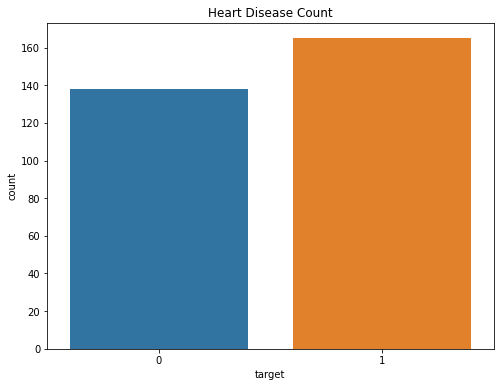

In [45]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = "target", data=df)
plt.title("Heart Disease Count")
plt.show()

### Heart Disease Count by Sex

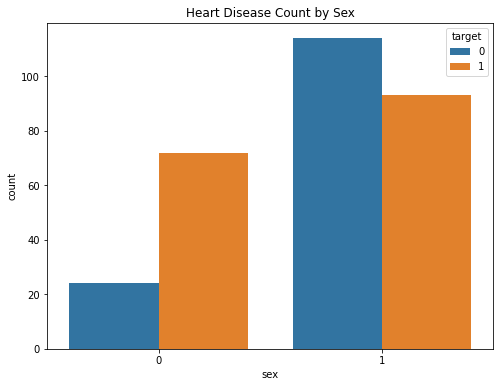

In [46]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="sex", hue="target", data=df)
plt.title("Heart Disease Count by Sex")
plt.show()

### Heart Disease Frequency for Ages

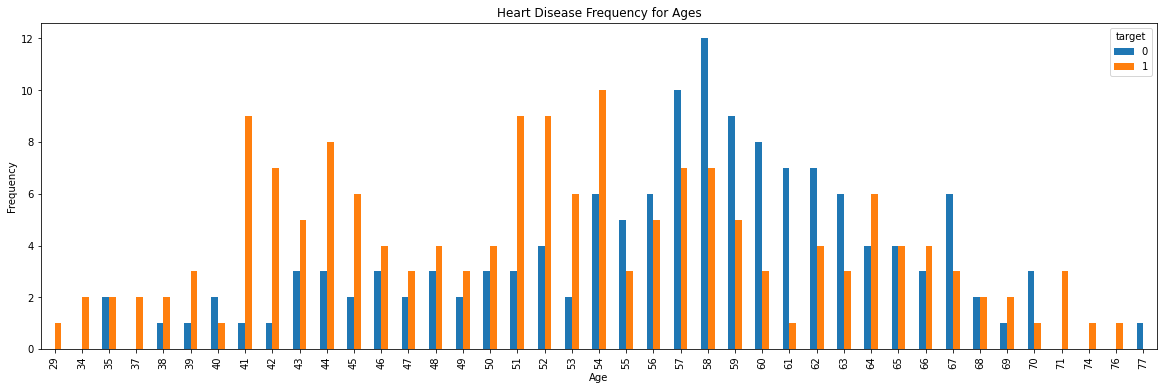

In [47]:
pd.crosstab(df.age, df.target).plot(kind="bar", figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Heart Disease Frequency According to Chest Pain Type

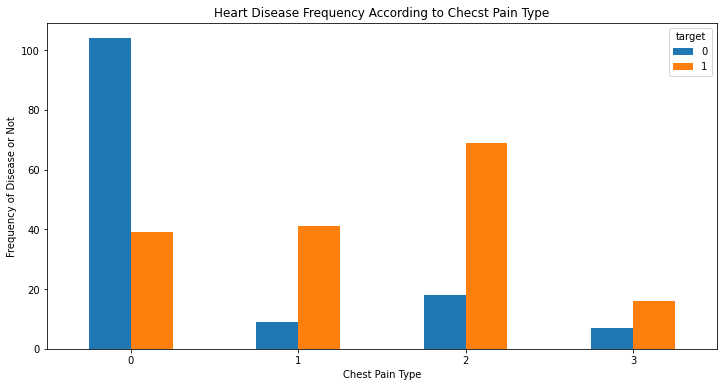

In [48]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(12,6))
plt.title('Heart Disease Frequency According to Checst Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()


# **Pearson's Similarity (Correlation Matrix)**

<img src="pearsons.png">

(14.5, -0.5)

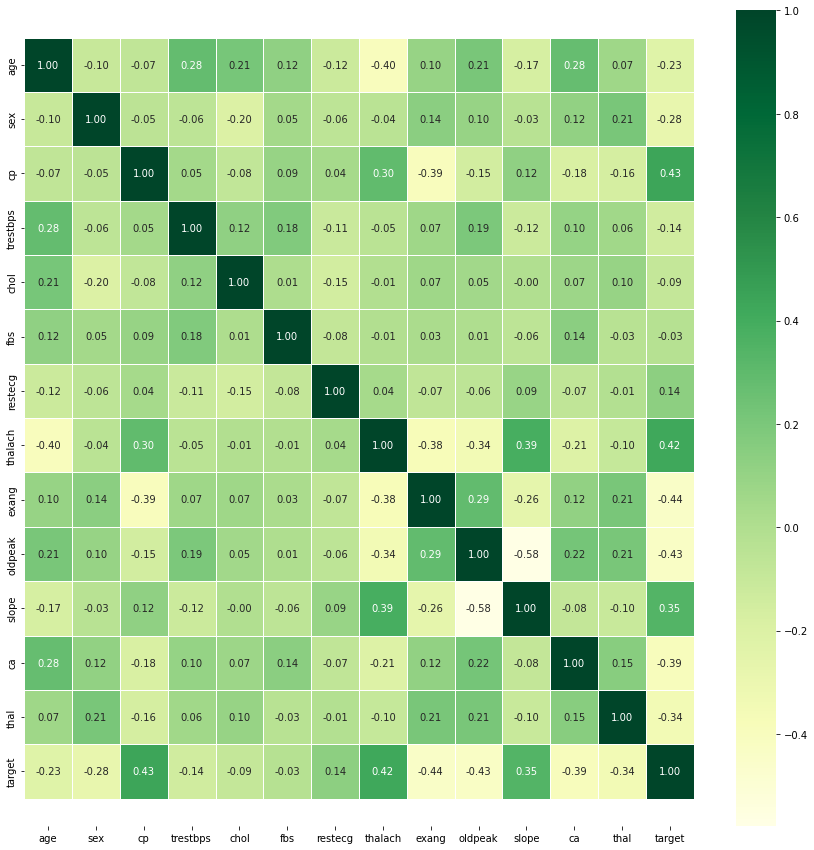

In [49]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),
            annot=True,
            cmap="YlGn",
            fmt='.2f',
            linewidths=0.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# **Data Processing**
need to create dummies variables for categorical variables (sex, cp, fbs, etc.)

In [50]:
ds = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
ds.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [ ]:
dcorr = ds.corr()

In [ ]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(dcorr, 
            cmap="YlGnBu", 
            annot=True, 
            fmt='.2f',  
            linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [51]:
print(df.columns)
print(ds.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
ds[col_to_scale] = s_sc.fit_transform(ds[col_to_scale])
ds.head()

# **Logistic Regression**

<img src="sigmoid.png">

In [52]:
X, y = ds.drop('target', axis=1), ds.target

test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [53]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
124,39,94,199,179,0.0,1,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
72,29,130,204,202,0.0,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
15,50,120,219,158,1.6,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
10,54,140,239,160,1.2,0,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
163,38,138,175,173,0.0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,140,233,163,0.6,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
71,51,94,227,154,0.0,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,1
106,69,160,234,131,0.1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
270,46,120,249,144,0.8,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,1


In [54]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8773584905660378

In [55]:
X_test

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
179,57,150,276,112,0.6,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
228,59,170,288,159,0.2,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
111,57,150,126,173,0.2,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,1
246,56,134,409,150,1.9,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
60,71,110,265,130,0.0,1,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,51,140,298,122,4.2,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
19,69,140,239,151,1.8,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
143,67,106,223,142,0.3,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
79,58,105,240,154,0.6,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [56]:
pred = model.predict(X_test)
pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [57]:
y_test.values

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1], dtype=int64)

In [58]:
model.score(X_test, y_test)

0.8571428571428571

## *Confusion Matrix*

In [59]:
from sklearn import metrics

In [60]:
cm = metrics.confusion_matrix(y_test, pred)
cm

array([[33,  8],
       [ 5, 45]], dtype=int64)

In [61]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84        41
           1       0.85      0.90      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



In [62]:
tn, fp, fn, tp = cm.ravel()
print(f'tn : {tn}, fp : {fp}, fn : {fn}, tp : {tp}')
print(f'Accuracy : {(tp+tn)/(tp+tn+fn+fp):.4f}')

tn : 33, fp : 8, fn : 5, tp : 45
Accuracy : 0.8571
